In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

import dsa
from dsa import *
from datasets import image
from models import resnet
import pickle

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the second GPU
  try:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

2 Physical GPUs, 1 Logical GPU


2022-03-26 15:48:13.608468: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-26 15:48:14.319997: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10545 MB memory:  -> device: 1, name: NVIDIA TITAN V, pci bus id: 0000:5e:00.0, compute capability: 7.0


In [32]:
target_ds, aux_ds = image.load_celeba()

In [33]:
celeba_dsa = {}
log = {}

In [45]:
# this is for 40 labels binary classification
for split in [4]:
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet(split=split, units=40, act='sigmoid')
    celeba_dsa["celeba-split="+str(split)] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    log["celea-split="+str(split)] = celeba_dsa["celeba-split="+str(split)].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        loss_fn=tf.keras.losses.binary_crossentropy,
        lr=0.001,
        batch_size=64,
        iterations=30000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.0012, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.001,
        lr_c=0.001,
        iter_d=1,   # the number of iterations to train the decoder on auxiliary data
        w=500.,
        verbose=True,
        log_freq=500)

======Split level is 4======
Iteration 500, average attack MSE: 0.3494496511369944
Iteration 1000, average attack MSE: 0.09833339823782444
Iteration 1500, average attack MSE: 0.07792432836443186
Iteration 2000, average attack MSE: 0.0786939573213458
Iteration 2500, average attack MSE: 0.07373190300911665
Iteration 3000, average attack MSE: 0.07043348364531994
Iteration 3500, average attack MSE: 0.07292646254599094
Iteration 4000, average attack MSE: 0.07232874557375908
Iteration 4500, average attack MSE: 0.06964584922790527
Iteration 5000, average attack MSE: 0.07031228590756655
Iteration 5500, average attack MSE: 0.07050401128828526
Iteration 6000, average attack MSE: 0.07217429650574922
Iteration 6500, average attack MSE: 0.07254298940300942
Iteration 7000, average attack MSE: 0.06306107476353645
Iteration 7500, average attack MSE: 0.0587957885786891
Iteration 8000, average attack MSE: 0.057980250872671606
Iteration 8500, average attack MSE: 0.056037624292075636
Iteration 9000, avera

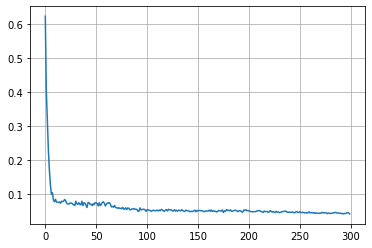

In [66]:
# plt.gca().invert_yaxis()
plt.grid()
# plt.yscale('logit')
# plt.ylim([0.025,0.5])
# plt.plot([sum(log["celea-split="+str(4)][i*100:(i+1)*100,1])/100 for i in range(int(30000/100))])

tf.Tensor(0.05132211, shape=(), dtype=float32)


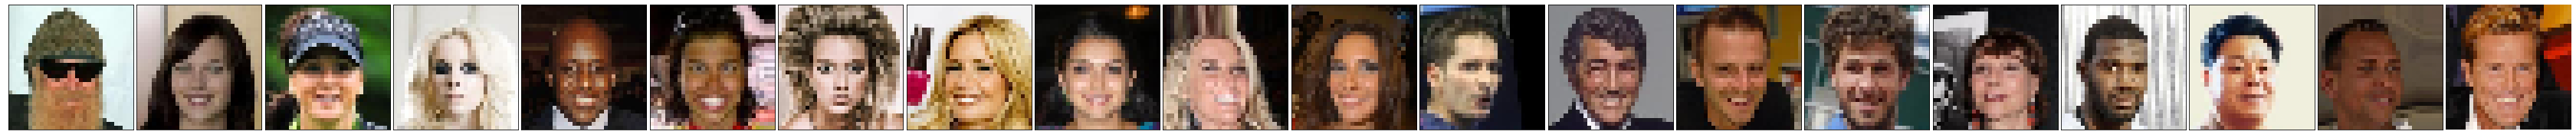

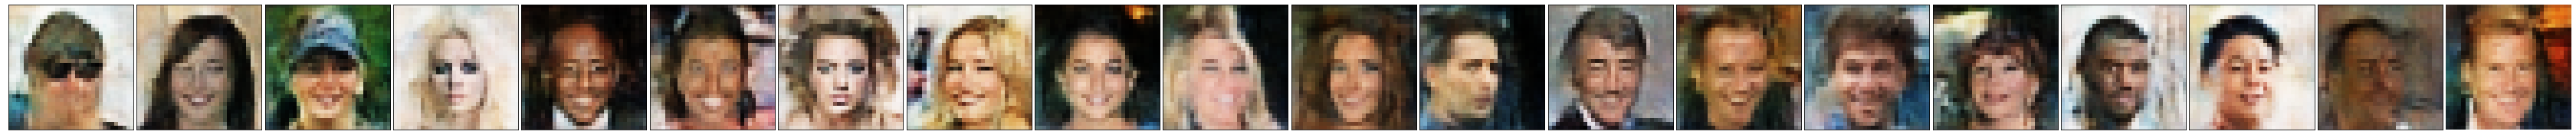

In [44]:
imgs = image.load_celeba(take_first=20)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno')
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
    return fig

fig = plot(imgs)
for split in [4]:
    mse, rec = celeba_dsa["celeba-split="+str(split)].attack_examples(imgs)
    fig = plot(rec)
    print(mse)

In [45]:
# this is for 40 labels binary classification
for split in [2, 3, 4]:
    make_f, make_g, make_e, make_d, make_c = resnet.make_resnet(split=split, units=40, act='sigmoid')
    celeba_dsa["celeba-split="+str(split)] = dsa(target_ds=target_ds, aux_ds=aux_ds)
    print("============================")
    print("======Split level is {}======".format(split))
    print("============================")
    log["celea-split="+str(split)] = celeba_dsa["celeba-split="+str(split)].dsa_attack(
        make_f=make_f,
        make_g=make_g,
        loss_fn=tf.keras.losses.binary_crossentropy,
        lr=0.001,
        batch_size=64,
        iterations=30000,
        make_e=make_e,
        make_d=make_d,
        make_c=make_c,
        lr_e=0.0012, # learning rate of the encoder/decoder/critic is set to be smaller
        lr_d=0.0001,
        lr_c=0.001,
        iter_d=40,   # the number of iterations to train the decoder on auxiliary data
        w=500.,
        verbose=True,
        log_freq=500)

======Split level is 2======
Iteration 500, average attack MSE: 0.17986145374923945
Iteration 1000, average attack MSE: 0.03215614857524633
Iteration 1500, average attack MSE: 0.02690882369503379
Iteration 2000, average attack MSE: 0.024228158075362445
Iteration 2500, average attack MSE: 0.02236521241441369
Iteration 3000, average attack MSE: 0.0212914615906775
Iteration 3500, average attack MSE: 0.0198750094473362
Iteration 4000, average attack MSE: 0.019455089259892703
Iteration 4500, average attack MSE: 0.018875571703538298
Iteration 5000, average attack MSE: 0.018458355708047748
Iteration 5500, average attack MSE: 0.01821129874140024
Iteration 6000, average attack MSE: 0.01736770317144692
Iteration 6500, average attack MSE: 0.017330913156270982
Iteration 7000, average attack MSE: 0.016703867068514226
Iteration 7500, average attack MSE: 0.016783591767773033
Iteration 8000, average attack MSE: 0.016191435756161807
Iteration 8500, average attack MSE: 0.01621788376569748
Iteration 9000

In [11]:
with open('log/celeba.pkl', 'wb') as f:
    pickle.dump(log, f)

tf.Tensor(0.0109832715, shape=(), dtype=float32)
tf.Tensor(0.017342586, shape=(), dtype=float32)
tf.Tensor(0.037591718, shape=(), dtype=float32)


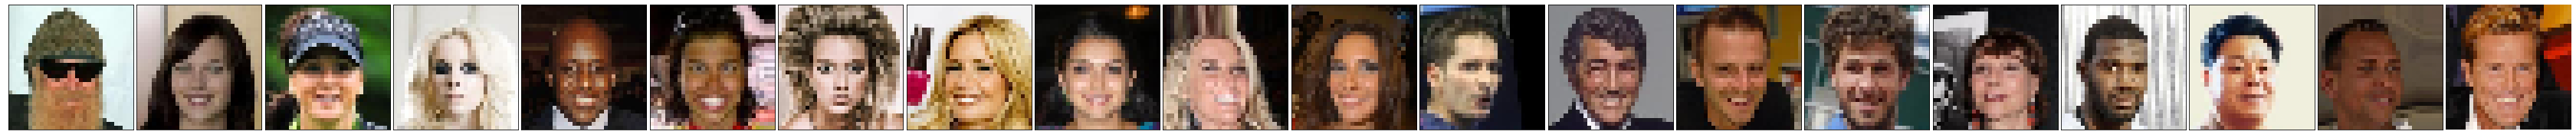

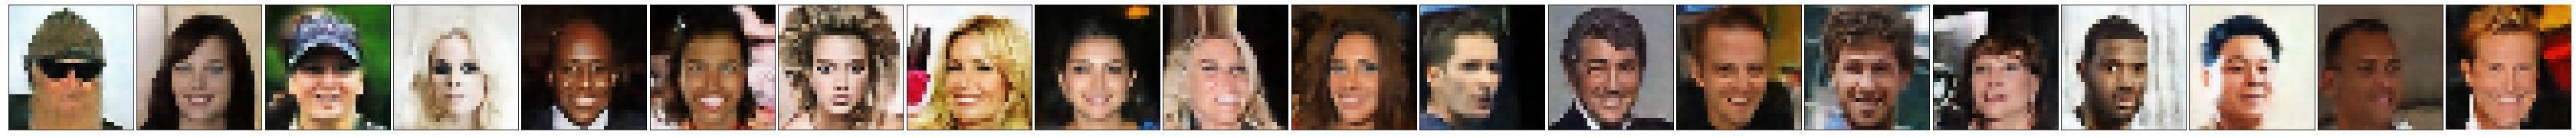

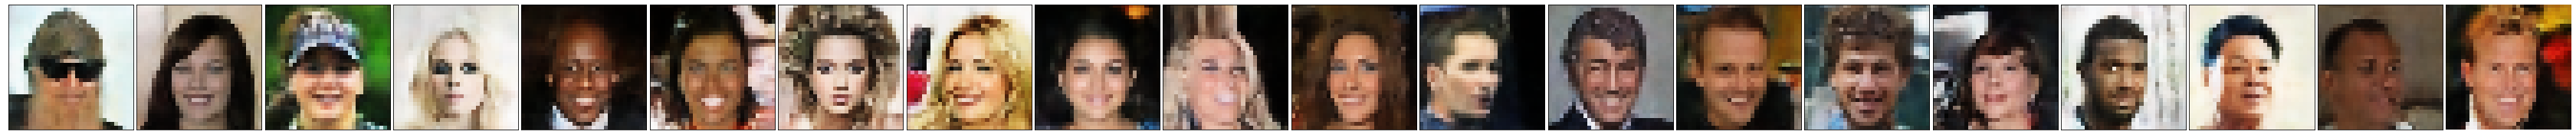

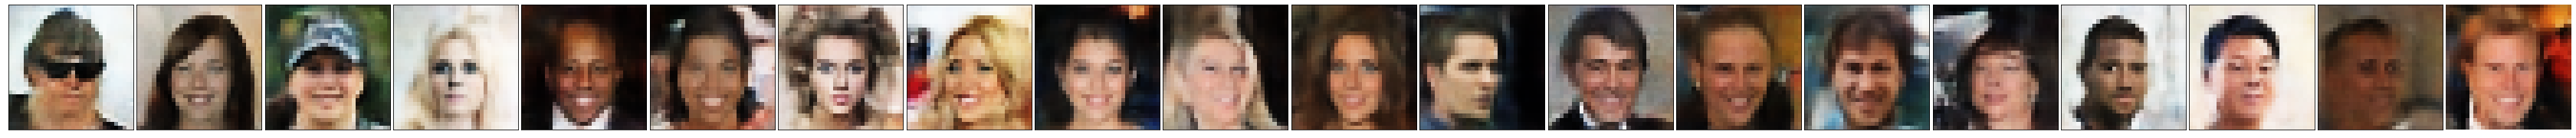

In [28]:
imgs = image.load_celeba(take_first=20)

def plot(X):
    n = len(X)
    X = (X+1)/2
    fig, ax = plt.subplots(1, n, figsize=(n*3,3))
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=-.05)
    for i in range(n):
        ax[i].imshow((X[i]), cmap='inferno')
        ax[i].set(xticks=[], yticks=[])
        ax[i].set_aspect('equal')
    return fig

fig = plot(imgs)
for split in [2,3,4]:
    mse, rec = celeba_dsa["celeba-split="+str(split)].attack_examples(imgs)
    fig = plot(rec)
    print(mse)

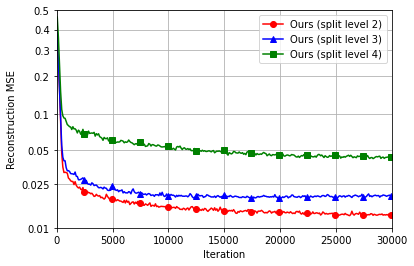

In [58]:
with open('log/celeba.pkl', 'rb') as f:
    log = pickle.load(f)

from matplotlib.pyplot import figure
# figure(figsize=(6.4,4.8))
log_freq = 100
plt.yscale('logit')
plt.xlim([0,30000])
plt.ylim([0.01, 0.5])
plt.grid()
plt.yticks([0.01,0.025,0.05,0.1,0.2,0.3,0.4,0.5], labels=['0.01','0.025','0.05','0.1','0.2','0.3','0.4','0.5'])
sampled_log_2 = [sum(log["celea-split=2"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celea-split=2"][:,0])/log_freq))]
sampled_log_3 = [sum(log["celea-split=3"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celea-split=3"][:,0])/log_freq))]
sampled_log_4 = [sum(log["celea-split=4"][:,1][i*log_freq:(i+1)*log_freq])/log_freq for i in range(int(len(log["celea-split=4"][:,0])/log_freq))]
ran = [i * log_freq + log_freq/2 for i in range(int(30000/log_freq))]
plt.plot(
    ran, sampled_log_2, 'ro-',
    ran, sampled_log_3, 'b^-',
    ran, sampled_log_4, 'gs-',
    markevery=[24,49,74,99,124,149,174,199,224,249,274,299])
plt.ylabel('Reconstruction MSE')
plt.xlabel('Iteration')
plt.legend([
    "Ours (split level 2)",
    "Ours (split level 3)",
    "Ours (split level 4)"])
plt.savefig("fig/celeba-dsa.pdf", bbox_inches='tight')